In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tqdm
import time

%matplotlib inline

In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
diploma_path = './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'
data_path = os.path.join(diploma_path, 'data')
os.listdir(diploma_path), os.listdir(data_path)


(['data', 'models chromo.ipynb'],
 ['some_bp_all_columns_pure.tsv',
  'seq_torch_float_many_folders.zip',
  'seq_torch_float_many_folders',
  'dataset_with_random.tsv',
  'dataset_wo_random.tsv'])

In [4]:
data_path


'./gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/data'

In [5]:
! ls './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/data'


dataset_with_random.tsv       seq_torch_float_many_folders.zip
dataset_wo_random.tsv	      some_bp_all_columns_pure.tsv
seq_torch_float_many_folders


In [6]:
! ls -lh './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/data'

total 218M
-rw------- 1 root root  51M Apr 26 23:02 dataset_with_random.tsv
-rw------- 1 root root  51M Apr 26 23:06 dataset_wo_random.tsv
drwx------ 2 root root 4.0K Apr 25 22:24 seq_torch_float_many_folders
-rw------- 1 root root  63M Apr 25 22:18 seq_torch_float_many_folders.zip
-rw------- 1 root root  54M Apr 25 19:46 some_bp_all_columns_pure.tsv


In [0]:
# ! unzip -q './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/data/seq_torch_float_many_folders.zip' -d './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/data' 

In [0]:
data_items_path = os.path.join(data_path, 'seq_torch_float_many_folders')


In [8]:
p = './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/data/seq_torch_float_many_folders'
print(len(os.listdir(p)))


60


In [9]:
tc = 0
i = 0
for d in sorted(os.listdir(p)):
    i += 1
    c = len(os.listdir(os.path.join(p, d)))
    print(c, end='\t')
    if i >= 6:
        print()
        i = 0
    tc += c
print('\n Total:', tc)


591	523	582	568	852	463	
775	512	530	438	890	1402	
502	577	1223	2144	2074	526	
746	779	1862	523	700	438	
945	619	1610	2338	1190	804	
1370	820	662	570	434	1012	
916	609	671	668	487	1033	
927	885	647	485	579	485	
1303	530	674	872	892	863	
1704	601	646	978	487	1084	

 Total: 51620


## Data preparation

In [0]:
dataframe = pd.read_csv(os.path.join(data_path, 'dataset_with_random.tsv'), sep='\t')


In [11]:
dataframe

,bp_id,chr,start,end,strand,chromo,seq
0,1072,3,78323077,78324077,+,1,AGTACCAACTATATGCATACGTTTATACTCCTCCTTAATTTGGTTA...
1,1073,3,78836402,78837402,-,1,CCCCAGCTACTCGGGAGGCTGAGGCAGGAGAATGGCGTGAACCCAG...
2,1074,3,78838751,78839751,-,1,GGAGATGGTTAATGGTACAAAAAATTGTTAGTAAGCATGAGTAAGA...
3,1075,3,78839772,78840772,+,1,TTGTATCAGTAAAGACATTCAGCTCCAGATTGCCAACACTCCCTAC...
4,1076,3,78843817,78844817,-,1,TTGGTTCAGGATTGTACTTCTGTGTTATAACTCCCTTTTATATGTC...
...,...,...,...,...,...,...,...
51619,1049576,8,89397905,89398905,-,0,AGTTATTCGGTTAGTGATTAAAACACTGGGTCATTTGAATCACACC...
51620,1049577,13,108800575,108801575,-,0,TCTGGATAATGATACTATAATGGAAGATACATAACATTATGTATTG...
51621,1049579,3,21438990,21439990,-,0,AGAATGTGGACCCCTGAGGGTCTCTTACTCACCCTTTCCCCAAATT...
51622,1049580,11,27826735,27827735,-,0,ATTGATATATTTTGTATATAATTTATAGTATGTAAATATAACTACT...


In [0]:
all_ids = list(dataframe['bp_id'])
all_labels = list(dataframe['chromo'])
all_seqs = list(dataframe['seq'])


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
a, b = train_test_split(all_ids, test_size=0.1)
partition = {
    'train' : list(a),
    'validation' : list(b)
}


In [0]:
labels_dict = dict()
for i in range(len(all_ids)):
    k = all_ids[i]
    v = all_labels[i]
    labels_dict[k] = v


In [0]:
data_items_path = os.path.join(data_path, 'seq_torch_float_many_folders')


In [17]:
"""
LIMIT = 10000
id_parts = dict()
for i in all_ids:
    id_parts[i] = i // LIMIT
"""


'\nLIMIT = 10000\nid_parts = dict()\nfor i in all_ids:\n    id_parts[i] = i // LIMIT\n'

In [0]:
nitrobase_dict = {
    'A' : 0,
    'C' : 1,
    'G' : 2,
    'T' : 3,
}

def input_encoding(x_str):
    values = [nitrobase_dict[b] for b in x_str]
    sz, max_value = len(values), len(nitrobase_dict)
    matrix = np.zeros([sz, max_value], dtype='float32')
    matrix[np.arange(sz), values] = 1
    return matrix


In [0]:
import torch
from torch.utils import data

class Dataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, data, list_IDs, labels):
        'Initialization'
        self.data = data
        self.labels = labels
        self.list_IDs = list_IDs
        #self.id_parts = id_parts

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]
        #part = self.id_parts[ID]

        # Load data and get label
        #path = os.path.join(self.data_path, 'part_{}/bp_id_{}.pt'.format(part, ID))
        #X = torch.load(path).float()
        seq = self.data[index]
        X = input_encoding(seq)
        X = torch.tensor(X)
        y = self.labels[ID]

        return X, y

In [0]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
# cudnn.benchmark = True

# Parameters
params = {
    'batch_size': 64,
    'shuffle': True,
    'num_workers': 6
}

# Generators
training_set = Dataset(all_seqs, partition['train'], labels_dict)
training_generator = data.DataLoader(training_set, **params)

validation_set = Dataset(all_seqs, partition['validation'], labels_dict)
validation_generator = data.DataLoader(validation_set, **params)


# Models

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [30]:
! pip install graphviz


In [31]:
! pip install torchviz


     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=e4514ce40fed66ca21bcd886fac14c47336d4f315901c3fd74113ce5a6df0482
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [0]:
import torchviz

#from torchviz import make_dot


In [0]:
criterion = nn.BCEWithLogitsLoss()
LR = 1e-4


## Simple Linear NN

In [0]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(4 * 1000, 64)
        self.linear2 = nn.Linear(64, 1)

    
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = self.linear2(x)

        x = x.view(-1)

        return x



In [0]:

model0 = LinearModel().to(device)
optimizer0 = optim.Adam(model0.parameters(), lr=LR)


In [0]:
sum(p.numel() for p in model0.parameters() if p.requires_grad), sum(p.numel() for p in model0.parameters() if not p.requires_grad)


(256129, 0)

In [0]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score


In [0]:
max_epochs = 10


In [0]:
# Loop over epochs
for epoch in range(max_epochs):
    t = time.time()
    # Training
    train_loss = 0
    train_steps = 0
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

        # Model computations
        optimizer0.zero_grad()
        
        output = model0(local_batch)
        loss = criterion(output, local_labels)

        loss.backward()
        train_loss += loss.data.item()
        train_steps += 1
        optimizer0.step()
    
    train_loss /= train_steps


    # Validation
    validation_loss = 0
    validation_steps = 0
    y, z = [], []
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
            # Transfer to GPU
            local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

            # Model computations
            output = model0(local_batch)
            loss = criterion(output, local_labels)

            y.extend(local_labels.int().cpu().numpy())
            z.extend(torch.sigmoid(output).cpu().numpy())

            validation_loss += loss.item()
            validation_steps += 1
    
    validation_loss /= validation_steps
    precision_value = precision_score(y, np.round(z))
    recall_value = recall_score(y, np.round(z))
    f1_value = f1_score(y, np.round(z))
    roc_auc_value = roc_auc_score(y, z)

    print('\n Epoch {}/{} finished in {:.1f} seconds'.format(epoch+1, max_epochs,
                                                      time.time() - t))
    print('Average train loss: {:.4f}'.format(train_loss))
    print('Validation: average loss: {:.4f}, precision: {:.4f}, recall: {:.4f}, F1: {:.4f}, ROC-AUC: {:.4f}'.format(
        validation_loss, precision_value, recall_value, f1_value, roc_auc_value))
    print('=' * 100, '\n')





 Epoch 1/10 finished in 6.3 seconds
Average train loss: 0.2564
Validation: average loss: 0.2523, precision: 0.5038, recall: 1.0000, F1: 0.6700, ROC-AUC: 0.4960


 Epoch 2/10 finished in 6.2 seconds
Average train loss: 0.2472
Validation: average loss: 0.2542, precision: 0.5038, recall: 1.0000, F1: 0.6700, ROC-AUC: 0.4969


 Epoch 3/10 finished in 6.2 seconds
Average train loss: 0.2446
Validation: average loss: 0.2577, precision: 0.5038, recall: 1.0000, F1: 0.6700, ROC-AUC: 0.4964


 Epoch 4/10 finished in 6.2 seconds
Average train loss: 0.2432
Validation: average loss: 0.2575, precision: 0.5038, recall: 1.0000, F1: 0.6700, ROC-AUC: 0.4957


 Epoch 5/10 finished in 6.2 seconds
Average train loss: 0.2419
Validation: average loss: 0.2587, precision: 0.5038, recall: 1.0000, F1: 0.6700, ROC-AUC: 0.4973


 Epoch 6/10 finished in 6.2 seconds
Average train loss: 0.2409
Validation: average loss: 0.2588, precision: 0.5038, recall: 1.0000, F1: 0.6700, ROC-AUC: 0.4975


 Epoch 7/10 finished in 6.2

## CNN

In [0]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv0 = nn.Conv1d(4, 4, 5, padding=2)

        self.conv1 = nn.Conv1d(4, 4, 3, padding=1)
        self.conv2 = nn.Conv1d(4, 8, 3, 2)

        self.conv3 = nn.Conv1d(8, 8, 3, padding=1)
        self.conv4 = nn.Conv1d(8, 16, 3, 2)

        self.conv5 = nn.Conv1d(16, 16, 3, padding=1)
        self.conv6 = nn.Conv1d(16, 32, 3, 2)

        self.conv7 = nn.Conv1d(32, 32, 3, 2)
        self.conv8 = nn.Conv1d(32, 32, 3, 2)
        self.conv9 = nn.Conv1d(32, 32, 3, 2)

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(32 * 14, 32)
        self.linear2 = nn.Linear(32, 1)

    
    def forward(self, x):
        x = x.permute(0, 2, 1)

        x = F.relu(self.conv0(x))

        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))

        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))

        x = F.relu(self.conv7(x))
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))

        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = self.linear2(x)

        x = x.view(-1)

        return x



In [0]:
from graphviz import Digraph

In [0]:
io_attr = {'fillcolor':'yellow'}
conv_attr = {'fillcolor':'lightblue'}
flat_attr = {'fillcolor':'red'}
lin_attr = {'fillcolor':'green'}


In [0]:
g1 = Digraph(name='CNNModel', format='png', node_attr=dict(style='filled', shape='box'))

g1.node('i', label='Input(shape=[batch_size, seq_len, 4])', _attributes=io_attr)

g1.node('c0', label='Conv1D(output_ch=4, kernel=3, pad=2)', _attributes=conv_attr)

g1.node('c1', label='Conv1D(output_ch=4, kernel=3, pad=1)', _attributes=conv_attr)
g1.node('c2', label='Conv1D(output_ch=8, kernel=3, stride=2)', _attributes=conv_attr)

g1.node('c3', label='Conv1D(output_ch=8, kernel=3, pad=1)', _attributes=conv_attr)
g1.node('c4', label='Conv1D(output_ch=16, kernel=3, stride=2)', _attributes=conv_attr)

g1.node('c5', label='Conv1D(output_ch=16, kernel=3, pad=1)', _attributes=conv_attr)
g1.node('c6', label='Conv1D(output_ch=32, kernel=3, stride=2)', _attributes=conv_attr)

g1.node('c7', label='Conv1D(output_ch=32, kernel=3, stride=2)', _attributes=conv_attr)
g1.node('c8', label='Conv1D(output_ch=32, kernel=3, stride=2)', _attributes=conv_attr)
g1.node('c9', label='Conv1D(output_ch=32, kernel=3, stride=2)', _attributes=conv_attr)

g1.node('f', label='Flatten', _attributes=flat_attr)

g1.node('l1', label='Linear(output_size=32)', _attributes=lin_attr)
g1.node('l2', label='Linear(output_size=1)', _attributes=lin_attr)

g1.node('o', label='Output(shape=[batch_size])', _attributes=io_attr)


g1.edge('i', 'c0')

g1.edge('c0', 'c1')
g1.edge('c1', 'c2')
g1.edge('c2', 'c3')
g1.edge('c3', 'c4')
g1.edge('c4', 'c5')
g1.edge('c5', 'c6')
g1.edge('c6', 'c7')
g1.edge('c7', 'c8')
g1.edge('c8', 'c9')

g1.edge('c9', 'f')

g1.edge('f', 'l1')
g1.edge('l1', 'l2')

g1.edge('l2', 'o')



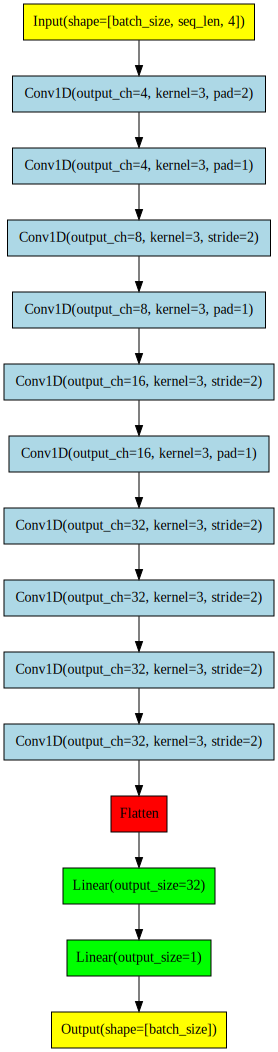

In [93]:
g1


In [94]:
g1.render(format='png')


'CNNModel.gv.png'

In [95]:
! ls


CNNModel.gv  CNNModel.gv.png  gdrive  sample_data


In [0]:
! mv CNNModel* './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'


In [97]:
! ls './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'


 attached       CNNModel.gv	  data
 attached.png   CNNModel.gv.png  'models chromo.ipynb'


In [98]:
! cat './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/CNNModel.gv'


digraph CNNModel {
	node [shape=box style=filled]
	i [label="Input(shape=[batch_size, seq_len, 4])" fillcolor=yellow]
	c0 [label="Conv1D(output_ch=4, kernel=3, pad=2)" fillcolor=lightblue]
	c1 [label="Conv1D(output_ch=4, kernel=3, pad=1)" fillcolor=lightblue]
	c2 [label="Conv1D(output_ch=8, kernel=3, stride=2)" fillcolor=lightblue]
	c3 [label="Conv1D(output_ch=8, kernel=3, pad=1)" fillcolor=lightblue]
	c4 [label="Conv1D(output_ch=16, kernel=3, stride=2)" fillcolor=lightblue]
	c5 [label="Conv1D(output_ch=16, kernel=3, pad=1)" fillcolor=lightblue]
	c6 [label="Conv1D(output_ch=32, kernel=3, stride=2)" fillcolor=lightblue]
	c7 [label="Conv1D(output_ch=32, kernel=3, stride=2)" fillcolor=lightblue]
	c8 [label="Conv1D(output_ch=32, kernel=3, stride=2)" fillcolor=lightblue]
	c9 [label="Conv1D(output_ch=32, kernel=3, stride=2)" fillcolor=lightblue]
	f [label=Flatten fillcolor=red]
	l1 [label="Linear(output_size=32)" fillcolor=green]
	l2 [label="Linear(output_size=1)" fillcolor=green]
	o [label=

In [0]:

model1 = CNNModel().to(device)
optimizer1 = optim.Adam(model1.parameters(), lr=LR)


In [26]:
sum(p.numel() for p in model1.parameters() if p.requires_grad), sum(p.numel() for p in model1.parameters() if not p.requires_grad)


(26905, 0)

In [0]:
x, y = next(iter(training_generator))

In [0]:
x = x.to(device)
y = y.float().to(device)


In [0]:
z = model1(x)


In [0]:
err = criterion(z, y)


In [44]:
dict(model1.parameters())

ValueError: ignored

In [0]:
model1_vis = torchviz.make_dot(err)


In [47]:
model1_vis.render('attached', format='png')


'attached.png'

In [0]:
! mv attached './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'

In [0]:
! mv attached.png './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'

In [51]:
! ls './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'

 attached   attached.png   data  'models chromo.ipynb'


In [0]:
! cat './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/attached'


In [0]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score


In [0]:
max_epochs = 10


In [0]:
# Loop over epochs
for epoch in range(max_epochs):
    t = time.time()
    # Training
    train_loss = 0
    train_steps = 0
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

        # Model computations
        optimizer1.zero_grad()
        
        output = model1(local_batch)
        loss = criterion(output, local_labels)

        loss.backward()
        train_loss += loss.data.item()
        train_steps += 1
        optimizer1.step()
    
    train_loss /= train_steps


    # Validation
    validation_loss = 0
    validation_steps = 0
    y, z = [], []
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
            # Transfer to GPU
            local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

            # Model computations
            output = model1(local_batch)
            loss = criterion(output, local_labels)

            y.extend(local_labels.int().cpu().numpy())
            z.extend(torch.sigmoid(output).cpu().numpy())

            validation_loss += loss.item()
            validation_steps += 1
    
    validation_loss /= validation_steps
    precision_value = precision_score(y, np.round(z))
    recall_value = recall_score(y, np.round(z))
    f1_value = f1_score(y, np.round(z))
    roc_auc_value = roc_auc_score(y, z)

    print('\n Epoch {}/{} finished in {:.1f} seconds'.format(epoch+1, max_epochs,
                                                      time.time() - t))
    print('Average train loss: {:.4f}'.format(train_loss))
    print('Validation: average loss: {:.4f}, precision: {:.4f}, recall: {:.4f}, F1: {:.4f}, ROC-AUC: {:.4f}'.format(
        validation_loss, precision_value, recall_value, f1_value, roc_auc_value))
    print('=' * 100, '\n')





 Epoch 1/10 finished in 22.4 seconds
Average train loss: 0.2617
Validation: average loss: 0.2555, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4969


 Epoch 2/10 finished in 22.4 seconds
Average train loss: 0.2511
Validation: average loss: 0.2507, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4886


 Epoch 3/10 finished in 22.4 seconds
Average train loss: 0.2509
Validation: average loss: 0.2500, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4952


 Epoch 4/10 finished in 22.5 seconds
Average train loss: 0.2507
Validation: average loss: 0.2520, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4953


 Epoch 5/10 finished in 22.4 seconds
Average train loss: 0.2505
Validation: average loss: 0.2500, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4945


 Epoch 6/10 finished in 22.4 seconds
Average train loss: 0.2507
Validation: average loss: 0.2501, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4899


 Epoch 7/10 finished 

## RNN

In [0]:
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()

        self.conv0 = nn.Conv1d(4, 4, 5, padding=2)

        self.conv1 = nn.Conv1d(4, 4, 3, padding=1)
        self.conv2 = nn.Conv1d(4, 8, 3, 2)

        self.conv3 = nn.Conv1d(8, 8, 3, padding=1)
        self.conv4 = nn.Conv1d(8, 16, 3, 2)

        self.conv5 = nn.Conv1d(16, 16, 3, padding=1)
        self.conv6 = nn.Conv1d(16, 32, 3, 2)

        self.lstm = nn.LSTM(32, 32, 1, bidirectional=True)

        self.conv7 = nn.Conv1d(64, 32, 3, 2)
        self.conv8 = nn.Conv1d(32, 32, 3, 2)
        self.conv9 = nn.Conv1d(32, 32, 3, 2)

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(32 * 14, 32)
        self.linear2 = nn.Linear(32, 1)

    
    def forward(self, x):
        x = x.permute(0, 2, 1)

        x = F.relu(self.conv0(x))

        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))

        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))

        x = x.permute(2, 0, 1)
        x, _ = self.lstm(x)
        x = x.permute(1, 2, 0)

        x = F.relu(self.conv7(x))
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))

        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = self.linear2(x)

        x = x.view(-1)

        return x



In [0]:
nn.LSTM()


In [0]:
g2 = Digraph(name='RNNModel', format='png', node_attr=dict(style='filled', shape='box'))

g2.node('i', label='Input(shape=[batch_size, seq_len, 4])', _attributes=io_attr)

g2.node('c0', label='Conv1D(output_ch=4, kernel=3, pad=2)', _attributes=conv_attr)

g2.node('c1', label='Conv1D(output_ch=4, kernel=3, pad=1)', _attributes=conv_attr)
g2.node('c2', label='Conv1D(output_ch=8, kernel=3, stride=2)', _attributes=conv_attr)

g2.node('c3', label='Conv1D(output_ch=8, kernel=3, pad=1)', _attributes=conv_attr)
g2.node('c4', label='Conv1D(output_ch=16, kernel=3, stride=2)', _attributes=conv_attr)

g2.node('c5', label='Conv1D(output_ch=16, kernel=3, pad=1)', _attributes=conv_attr)
g2.node('c6', label='Conv1D(output_ch=32, kernel=3, stride=2)', _attributes=conv_attr)

g2.node('lstm', label='LSTM(hidden_size=32, n_layers=1, bidirectional=True)',
        _attributes={'fillcolor':'violet'})

g2.node('c7', label='Conv1D(input_ch=64, output_ch=32, kernel=3, stride=2)', _attributes=conv_attr)
g2.node('c8', label='Conv1D(output_ch=32, kernel=3, stride=2)', _attributes=conv_attr)
g2.node('c9', label='Conv1D(output_ch=32, kernel=3, stride=2)', _attributes=conv_attr)

g2.node('f', label='Flatten', _attributes=flat_attr)

g2.node('l1', label='Linear(output_size=32)', _attributes=lin_attr)
g2.node('l2', label='Linear(output_size=1)', _attributes=lin_attr)

g2.node('o', label='Output(shape=[batch_size])', _attributes=io_attr)


g2.edge('i', 'c0')

g2.edge('c0', 'c1')
g2.edge('c1', 'c2')
g2.edge('c2', 'c3')
g2.edge('c3', 'c4')
g2.edge('c4', 'c5')
g2.edge('c5', 'c6')

g2.edge('c6', 'lstm')

g2.edge('lstm', 'c7')
g2.edge('c7', 'c8')
g2.edge('c8', 'c9')

g2.edge('c9', 'f')

g2.edge('f', 'l1')
g2.edge('l1', 'l2')

g2.edge('l2', 'o')



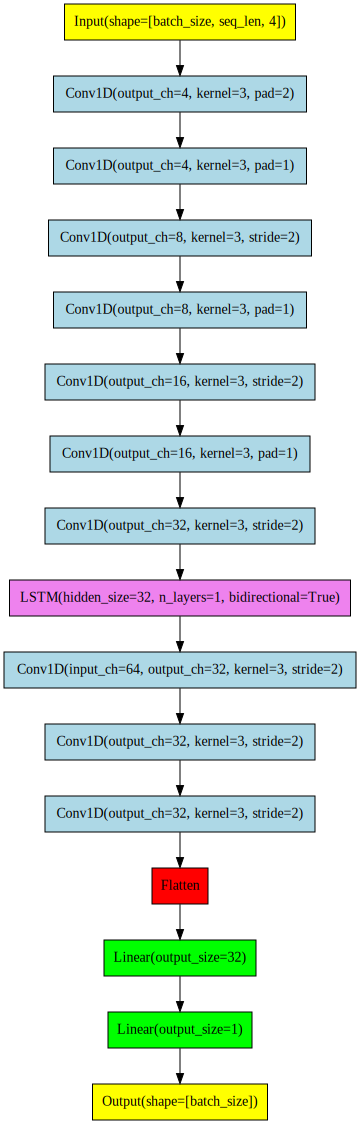

In [102]:
g2


In [103]:
g2.render(format='png')


'RNNModel.gv.png'

In [104]:
! ls


gdrive	RNNModel.gv  RNNModel.gv.png  sample_data


In [0]:
! mv RNNModel* './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'


In [106]:
! ls './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'


 attached       CNNModel.gv	  data			 RNNModel.gv
 attached.png   CNNModel.gv.png  'models chromo.ipynb'	 RNNModel.gv.png


In [107]:
! cat './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/RNNModel.gv'


digraph RNNModel {
	node [shape=box style=filled]
	i [label="Input(shape=[batch_size, seq_len, 4])" fillcolor=yellow]
	c0 [label="Conv1D(output_ch=4, kernel=3, pad=2)" fillcolor=lightblue]
	c1 [label="Conv1D(output_ch=4, kernel=3, pad=1)" fillcolor=lightblue]
	c2 [label="Conv1D(output_ch=8, kernel=3, stride=2)" fillcolor=lightblue]
	c3 [label="Conv1D(output_ch=8, kernel=3, pad=1)" fillcolor=lightblue]
	c4 [label="Conv1D(output_ch=16, kernel=3, stride=2)" fillcolor=lightblue]
	c5 [label="Conv1D(output_ch=16, kernel=3, pad=1)" fillcolor=lightblue]
	c6 [label="Conv1D(output_ch=32, kernel=3, stride=2)" fillcolor=lightblue]
	lstm [label="LSTM(hidden_size=32, n_layers=1, bidirectional=True)" fillcolor=violet]
	c7 [label="Conv1D(input_ch=64, output_ch=32, kernel=3, stride=2)" fillcolor=lightblue]
	c8 [label="Conv1D(output_ch=32, kernel=3, stride=2)" fillcolor=lightblue]
	c9 [label="Conv1D(output_ch=32, kernel=3, stride=2)" fillcolor=lightblue]
	f [label=Flatten fillcolor=red]
	l1 [label="Line

In [0]:

model2 = RNNModel().to(device)
optimizer2 = optim.Adam(model2.parameters(), lr=LR)


In [0]:
sum(p.numel() for p in model2.parameters() if p.requires_grad), sum(p.numel() for p in model2.parameters() if not p.requires_grad)


(46873, 0)

In [0]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score


In [0]:
max_epochs = 10


In [0]:
# Loop over epochs
for epoch in range(max_epochs):
    t = time.time()
    # Training
    train_loss = 0
    train_steps = 0
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

        # Model computations
        optimizer2.zero_grad()
        
        output = model2(local_batch)
        loss = criterion(output, local_labels)

        loss.backward()
        train_loss += loss.data.item()
        train_steps += 1
        optimizer2.step()
    
    train_loss /= train_steps


    # Validation
    validation_loss = 0
    validation_steps = 0
    y, z = [], []
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
            # Transfer to GPU
            local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

            # Model computations
            output = model2(local_batch)
            loss = criterion(output, local_labels)

            y.extend(local_labels.int().cpu().numpy())
            z.extend(torch.sigmoid(output).cpu().numpy())

            validation_loss += loss.item()
            validation_steps += 1
    
    validation_loss /= validation_steps
    precision_value = precision_score(y, np.round(z))
    recall_value = recall_score(y, np.round(z))
    f1_value = f1_score(y, np.round(z))
    roc_auc_value = roc_auc_score(y, z)

    print('\n Epoch {}/{} finished in {:.1f} seconds'.format(epoch+1, max_epochs,
                                                      time.time() - t))
    print('Average train loss: {:.4f}'.format(train_loss))
    print('Validation: average loss: {:.4f}, precision: {:.4f}, recall: {:.4f}, F1: {:.4f}, ROC-AUC: {:.4f}'.format(
        validation_loss, precision_value, recall_value, f1_value, roc_auc_value))
    print('=' * 100, '\n')





 Epoch 1/10 finished in 29.4 seconds
Average train loss: 0.2580
Validation: average loss: 0.2501, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4880


 Epoch 2/10 finished in 29.1 seconds
Average train loss: 0.2511
Validation: average loss: 0.2500, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4969


 Epoch 3/10 finished in 29.3 seconds
Average train loss: 0.2507
Validation: average loss: 0.2508, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4998


 Epoch 4/10 finished in 29.3 seconds
Average train loss: 0.2505
Validation: average loss: 0.2502, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4942


 Epoch 5/10 finished in 29.3 seconds
Average train loss: 0.2507
Validation: average loss: 0.2517, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4977


 Epoch 6/10 finished in 29.3 seconds
Average train loss: 0.2506
Validation: average loss: 0.2501, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4968


 Epoch 7/10 finished 

## Transformer

In [0]:
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

In [0]:
class TransformerModel(nn.Module):
    def __init__(self):
        super(TransformerModel, self).__init__()

        hidden_dim = 32

        self.embed = nn.Linear(4, hidden_dim)
        self.pos_encoder = PositionalEncoding(hidden_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(hidden_dim,
                                                        nhead=4,
                                                        dim_feedforward=hidden_dim)
        self.encoder = nn.TransformerEncoder(self.encoder_layer,
                                             num_layers=2)

        self.conv = nn.Conv1d(hidden_dim, 16, 5, 5)

        self.flatten = nn.Flatten()

        self.linear = nn.Linear(16 * 200, 1)

    
    def forward(self, x):
        x = self.embed(x)
        x = self.pos_encoder(x)
        x = self.encoder(x)

        x = x.permute(0, 2, 1)
        x = F.relu(self.conv(x))

        x = self.flatten(x)
        x = self.linear(x)

        x = x.view(-1)

        return x


In [0]:
g3 = Digraph(name='TransformerModel', format='png', node_attr=dict(style='filled', shape='box'))

g3.node('i', label='Input(shape=[batch_size, seq_len, 4])', _attributes=io_attr)

g3.node('embed', label='Embed(output_size=32)', _attributes=lin_attr)

g3.node('pos_enc', label='PositionalEncoding', _attributes={'fillcolor':'azure'})

g3.node('encoder', label='TransformerEncoder(n_layers=2, n_head=4, dim_feedfwd=32)', _attributes={'fillcolor':'orange'})

g3.node('c', label='Conv1D(input_ch=32, output_ch=16, kernel=5, stride=5)', _attributes=conv_attr)

g3.node('f', label='Flatten', _attributes=flat_attr)

g3.node('l', label='Linear(output_size=1)', _attributes=lin_attr)

g3.node('o', label='Output(shape=[batch_size])', _attributes=io_attr)


g3.edge('i', 'embed')

g3.edge('embed', 'pos_enc')

g3.edge('pos_enc', 'encoder')

g3.edge('encoder', 'c')

g3.edge('c', 'f')

g3.edge('f', 'l')

g3.edge('l', 'o')



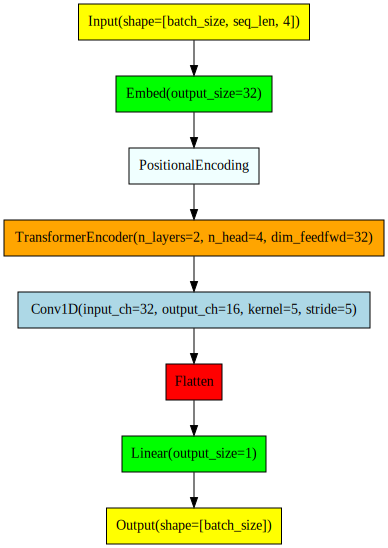

In [125]:
g3


In [126]:
g3.render()


'TransformerModel.gv.png'

In [127]:
! ls


gdrive	sample_data  TransformerModel.gv  TransformerModel.gv.png


In [0]:
! mv TransformerModel* './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'


In [129]:
! ls './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis'


 attached	   data			  TransformerModel.gv
 attached.png	  'models chromo.ipynb'   TransformerModel.gv.png
 CNNModel.gv	   RNNModel.gv
 CNNModel.gv.png   RNNModel.gv.png


In [130]:
! cat './gdrive/My Drive/Colab Notebooks/Diploma/Chromothripsis/TransformerModel.gv'


digraph TransformerModel {
	node [shape=box style=filled]
	i [label="Input(shape=[batch_size, seq_len, 4])" fillcolor=yellow]
	embed [label="Embed(output_size=32)" fillcolor=green]
	pos_enc [label=PositionalEncoding fillcolor=azure]
	encoder [label="TransformerEncoder(n_layers=2, n_head=4, dim_feedfwd=32)" fillcolor=orange]
	c [label="Conv1D(input_ch=32, output_ch=16, kernel=5, stride=5)" fillcolor=lightblue]
	f [label=Flatten fillcolor=red]
	l [label="Linear(output_size=1)" fillcolor=green]
	o [label="Output(shape=[batch_size])" fillcolor=yellow]
	i -> embed
	embed -> pos_enc
	pos_enc -> encoder
	encoder -> c
	c -> f
	f -> l
	l -> o
}


In [0]:

model3 = TransformerModel().to(device)
optimizer3 = optim.Adam(model3.parameters(), lr=LR)


In [0]:
sum(p.numel() for p in model3.parameters() if p.requires_grad), sum(p.numel() for p in model3.parameters() if not p.requires_grad)


(25329, 0)

In [0]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score


In [0]:
max_epochs = 10


In [0]:
# Loop over epochs
for epoch in range(max_epochs):
    t = time.time()
    # Training
    train_loss = 0
    train_steps = 0
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

        # Model computations
        optimizer3.zero_grad()
        
        output = model3(local_batch)
        loss = criterion(output, local_labels)

        loss.backward()
        train_loss += loss.data.item()
        train_steps += 1
        optimizer3.step()
    
    train_loss /= train_steps


    # Validation
    validation_loss = 0
    validation_steps = 0
    y, z = [], []
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
            # Transfer to GPU
            local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

            # Model computations
            output = model3(local_batch)
            loss = criterion(output, local_labels)

            y.extend(local_labels.int().cpu().numpy())
            z.extend(torch.sigmoid(output).cpu().numpy())

            validation_loss += loss.item()
            validation_steps += 1
    
    validation_loss /= validation_steps
    precision_value = precision_score(y, np.round(z))
    recall_value = recall_score(y, np.round(z))
    f1_value = f1_score(y, np.round(z))
    roc_auc_value = roc_auc_score(y, z)

    print('\n Epoch {}/{} finished in {:.1f} seconds'.format(epoch+1, max_epochs,
                                                      time.time() - t))
    print('Average train loss: {:.4f}'.format(train_loss))
    print('Validation: average loss: {:.4f}, precision: {:.4f}, recall: {:.4f}, F1: {:.4f}, ROC-AUC: {:.4f}'.format(
        validation_loss, precision_value, recall_value, f1_value, roc_auc_value))
    print('=' * 100, '\n')





 Epoch 1/10 finished in 29.0 seconds
Average train loss: 0.2567
Validation: average loss: 0.2525, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4931


 Epoch 2/10 finished in 29.0 seconds
Average train loss: 0.2533
Validation: average loss: 0.2504, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4895


 Epoch 3/10 finished in 29.0 seconds
Average train loss: 0.2524
Validation: average loss: 0.2643, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4974


 Epoch 4/10 finished in 29.0 seconds
Average train loss: 0.2527
Validation: average loss: 0.2522, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4899


 Epoch 5/10 finished in 29.0 seconds
Average train loss: 0.2526
Validation: average loss: 0.2504, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.4831


 Epoch 6/10 finished in 29.0 seconds
Average train loss: 0.2516
Validation: average loss: 0.2505, precision: 0.4935, recall: 1.0000, F1: 0.6609, ROC-AUC: 0.5071


 Epoch 7/10 finished 

Transformer for overfitting:

In [0]:
class TransformerModel2(nn.Module):
    def __init__(self):
        super(TransformerModel2, self).__init__()

        hidden_dim = 128

        self.embed = nn.Linear(4, hidden_dim)
        self.pos_encoder = PositionalEncoding(hidden_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(hidden_dim,
                                                        nhead=8,
                                                        dim_feedforward=hidden_dim)
        self.encoder = nn.TransformerEncoder(self.encoder_layer,
                                             num_layers=4)

        #self.conv = nn.Conv1d(hidden_dim, 16, 5, 5)

        self.flatten = nn.Flatten()

        self.linear = nn.Linear(hidden_dim * 1000, 1)

    
    def forward(self, x):
        x = self.embed(x)
        x = self.pos_encoder(x)
        x = self.encoder(x)

        #x = x.permute(0, 2, 1)
        #x = F.relu(self.conv(x))

        x = self.flatten(x)
        x = self.linear(x)

        x = x.view(-1)

        return x


In [0]:

model4 = TransformerModel2().to(device)
optimizer4 = optim.Adam(model4.parameters(), lr=LR)


In [0]:
sum(p.numel() for p in model4.parameters() if p.requires_grad), sum(p.numel() for p in model4.parameters() if not p.requires_grad)


(626561, 0)

In [0]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score


In [0]:
max_epochs = 10


In [0]:
# Loop over epochs
for epoch in range(max_epochs):
    t = time.time()
    # Training
    train_loss = 0
    train_steps = 0
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

        # Model computations
        optimizer4.zero_grad()
        
        output = model4(local_batch)
        loss = criterion(output, local_labels)

        loss.backward()
        train_loss += loss.data.item()
        train_steps += 1
        optimizer4.step()
    
    train_loss /= train_steps


    # Validation
    validation_loss = 0
    validation_steps = 0
    y, z = [], []
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
            # Transfer to GPU
            local_batch, local_labels = local_batch.to(device), local_labels.float().to(device)

            # Model computations
            output = model4(local_batch)
            loss = criterion(output, local_labels)

            y.extend(local_labels.int().cpu().numpy())
            z.extend(torch.sigmoid(output).cpu().numpy())

            validation_loss += loss.item()
            validation_steps += 1
    
    validation_loss /= validation_steps
    precision_value = precision_score(y, np.round(z))
    recall_value = recall_score(y, np.round(z))
    f1_value = f1_score(y, np.round(z))
    roc_auc_value = roc_auc_score(y, z)

    print('\n Epoch {}/{} finished in {:.1f} seconds'.format(epoch+1, max_epochs,
                                                      time.time() - t))
    print('Average train loss: {:.4f}'.format(train_loss))
    print('Validation: average loss: {:.4f}, precision: {:.4f}, recall: {:.4f}, F1: {:.4f}, ROC-AUC: {:.4f}'.format(
        validation_loss, precision_value, recall_value, f1_value, roc_auc_value))
    print('=' * 100, '\n')





 Epoch 1/10 finished in 99.5 seconds
Average train loss: 0.7590
Validation: average loss: 0.7085, precision: 0.4558, recall: 0.0263, F1: 0.0497, ROC-AUC: 0.4940


 Epoch 2/10 finished in 99.3 seconds
Average train loss: 0.7111
Validation: average loss: 0.7599, precision: 0.4936, recall: 1.0000, F1: 0.6610, ROC-AUC: 0.5024


 Epoch 3/10 finished in 99.3 seconds
Average train loss: 0.7034
Validation: average loss: 0.7015, precision: 0.4991, recall: 0.6833, F1: 0.5769, ROC-AUC: 0.5110


 Epoch 4/10 finished in 99.3 seconds
Average train loss: 0.6992
Validation: average loss: 0.7183, precision: 0.5307, recall: 0.0577, F1: 0.1041, ROC-AUC: 0.5168


 Epoch 5/10 finished in 99.2 seconds
Average train loss: 0.6950
Validation: average loss: 0.7111, precision: 0.5027, recall: 0.7696, F1: 0.6082, ROC-AUC: 0.5131


 Epoch 6/10 finished in 99.2 seconds
Average train loss: 0.6947
Validation: average loss: 0.7177, precision: 0.5208, recall: 0.1378, F1: 0.2179, ROC-AUC: 0.5144


 Epoch 7/10 finished 